In [262]:
pip install missingno

In [263]:
# Importing all files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import missingno as msno 

In [265]:
dash = '-----------------------------------------------------------'

In [266]:
%rm -rf ML-Assignment-data
!git clone https://github.com/py-here/ML-Assignment-data

Cloning into 'ML-Assignment-data'...
remote: Enumerating objects: 9, done.
remote: Counting objects: 100% (9/9), done.
remote: Compressing objects: 100% (7/7), done.
remote: Total 9 (delta 1), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (9/9), done.


In [267]:
train_df = pd.read_csv("/content/ML-Assignment-data/Train.csv")


In [392]:
test_df = pd.read_csv("/content/ML-Assignment-data/test.csv")

# Data Analysis & Cleaning

## Data Exploration

In [268]:
train_df.shape

(44550, 41)

In [269]:
df = train_df.append(test_df)
df.shape

(59400, 42)

In [270]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44550 entries, 0 to 44549
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     44550 non-null  int64  
 1   amount_tsh             44550 non-null  float64
 2   date_recorded          44550 non-null  object 
 3   funder                 41757 non-null  object 
 4   gps_height             44550 non-null  int64  
 5   installer              41743 non-null  object 
 6   longitude              44550 non-null  float64
 7   latitude               44550 non-null  float64
 8   wpt_name               44550 non-null  object 
 9   num_private            44550 non-null  int64  
 10  basin                  44550 non-null  object 
 11  subvillage             44263 non-null  object 
 12  region                 44550 non-null  object 
 13  region_code            44550 non-null  int64  
 14  district_code          44550 non-null  int64  
 15  lg

In [271]:
display(train_df.describe())
print(dash)
print(dash)
print('Data Size:',train_df.shape)
print('\nData types:',train_df.dtypes)
print(dash)
display(train_df.head())

,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
count,44550.000000,44550.000000,44550.000000,44550.000000,4.455000e+04,44550.000000,44550.000000,44550.000000,44550.000000,44550.000000
mean,37192.623681,307.623224,665.490774,34.084084,-5.721980e+00,0.521549,15.338563,5.678967,179.112750,1295.782155
std,21399.827198,2402.742799,693.653179,6.555924,2.948828e+00,13.835868,17.672144,9.724205,478.995645,953.183961
min,1.000000,0.000000,-90.000000,0.000000,-1.164838e+01,0.000000,1.000000,0.000000,0.000000,0.000000
25%,18723.250000,0.000000,0.000000,33.105585,-8.574241e+00,0.000000,5.000000,2.000000,0.000000,0.000000
50%,37183.500000,0.000000,363.000000,34.905600,-5.045611e+00,0.000000,12.000000,3.000000,25.000000,1985.000000
75%,55647.500000,20.000000,1318.000000,37.176859,-3.327795e+00,0.000000,17.000000,5.000000,210.000000,2004.000000
max,74247.000000,170000.000000,2770.000000,40.345193,-2.000000e-08,1776.000000,99.000000,80.000000,30500.000000,2013.000000


-----------------------------------------------------------
-----------------------------------------------------------
Data Size: (44550, 41)

Data types: id                         int64
amount_tsh               float64
date_recorded             object
funder                    object
gps_height                 int64
                          ...   
source_type               object
source_class              object
waterpoint_type           object
waterpoint_type_group     object
status_group              object
Length: 41, dtype: object
-----------------------------------------------------------


,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,7411,7.0,2013-03-20,Germany Republi,1203,CES,37.228664,-3.256505,Kwa Abdalla,0,Pangani,Mafurini,Kilimanjaro,3,5,Hai,Machame Kaskazini,90,True,GeoData Consultants Ltd,Water Board,Machame water supply,True,2008,gravity,gravity,gravity,water board,user-group,pay per bucket,per bucket,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,18014,0.0,2011-02-21,Cdtf,1409,CDTF,34.615481,-9.972601,none,0,Lake Nyasa,Ituni,Iringa,11,5,Ludewa,Luana,70,False,GeoData Consultants Ltd,Private operator,Mgowel,False,1984,gravity,gravity,gravity,private operator,commercial,never pay,never pay,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
2,26103,0.0,2013-01-04,Government Of Tanzania,1572,DWE,36.658778,-3.321529,Kwa Loishiye,0,Pangani,Melebuki,Arusha,2,2,Arusha Rural,Kimnyaki,150,True,GeoData Consultants Ltd,VWC,Saitero olosaita pipe line,True,2002,gravity,gravity,gravity,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe,non functional
3,31140,0.0,2011-04-03,District Council,0,District Council,33.628025,-8.860795,Mwanzechele,0,Rufiji,Darajani,Mbeya,12,2,Mbeya Rural,Inyala,0,True,GeoData Consultants Ltd,VWC,NaN,True,0,gravity,gravity,gravity,wug,user-group,pay annually,annually,soft,good,insufficient,insufficient,river,river/lake,surface,communal standpipe,communal standpipe,functional
4,12286,300.0,2013-03-08,District Council,1283,District Council,37.655509,-3.669777,Kwa Kidaya,0,Pangani,Mwira A,Kilimanjaro,3,2,Mwanga,Shinghatini,34,True,GeoData Consultants Ltd,VWC,Churu water supply,False,2007,gravity,gravity,gravity,vwc,user-group,pay monthly,monthly,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe,functional


In [272]:
for col in train_df.columns.values:
  list_vals = pd.unique(train_df[col])
  print('\n' + col + ' is of type '+ str(train_df[col].dtypes) + ', has ' + str(len(list_vals)) + ' unique values, and ' + str(np.sum(pd.isnull(train_df[col]))) + ' null entries')
  #print iff colloum has less than 10 unique values
  if len(list_vals) < 10:
    list_str = ''
    for n_value in range(len(list_vals)):
      list_str = list_str + str(list_vals[n_value]) + ', '
    print(' These are: '+ list_str[0:len(list_str) - 2])


id is of type int64, has 44550 unique values, and 0 null entries

amount_tsh is of type float64, has 85 unique values, and 0 null entries

date_recorded is of type object, has 346 unique values, and 0 null entries

funder is of type object, has 1652 unique values, and 2793 null entries

gps_height is of type int64, has 2396 unique values, and 0 null entries

installer is of type object, has 1855 unique values, and 2807 null entries

longitude is of type float64, has 43155 unique values, and 0 null entries

latitude is of type float64, has 43155 unique values, and 0 null entries

wpt_name is of type object, has 28991 unique values, and 0 null entries

num_private is of type int64, has 59 unique values, and 0 null entries

basin is of type object, has 9 unique values, and 0 null entries
 These are: Pangani, Lake Nyasa, Rufiji, Lake Tanganyika, Lake Victoria, Wami / Ruvu, Internal, Ruvuma / Southern Coast, Lake Rukwa

subvillage is of type object, has 16618 unique values, and 287 null en

In [273]:
pd.set_option('display.max_rows', None)
print('Number of null values:\n',train_df.isnull().sum())
pd.set_option('display.max_rows', 15)

Number of null values:
 id                           0
amount_tsh                   0
date_recorded                0
funder                    2793
gps_height                   0
installer                 2807
longitude                    0
latitude                     0
wpt_name                     0
num_private                  0
basin                        0
subvillage                 287
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            2491
recorded_by                  0
scheme_management         2832
scheme_name              21110
permit                    2336
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality  

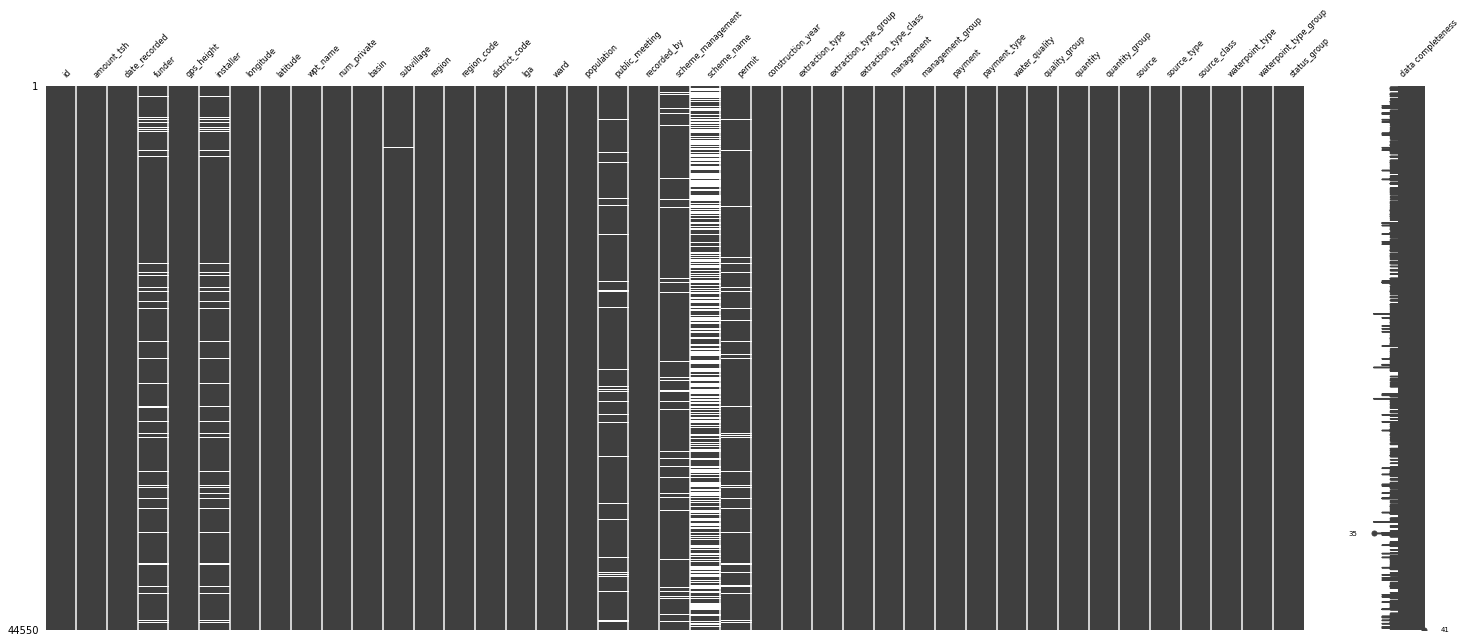

In [274]:
msno.matrix(train_df, labels=True, fontsize=8)

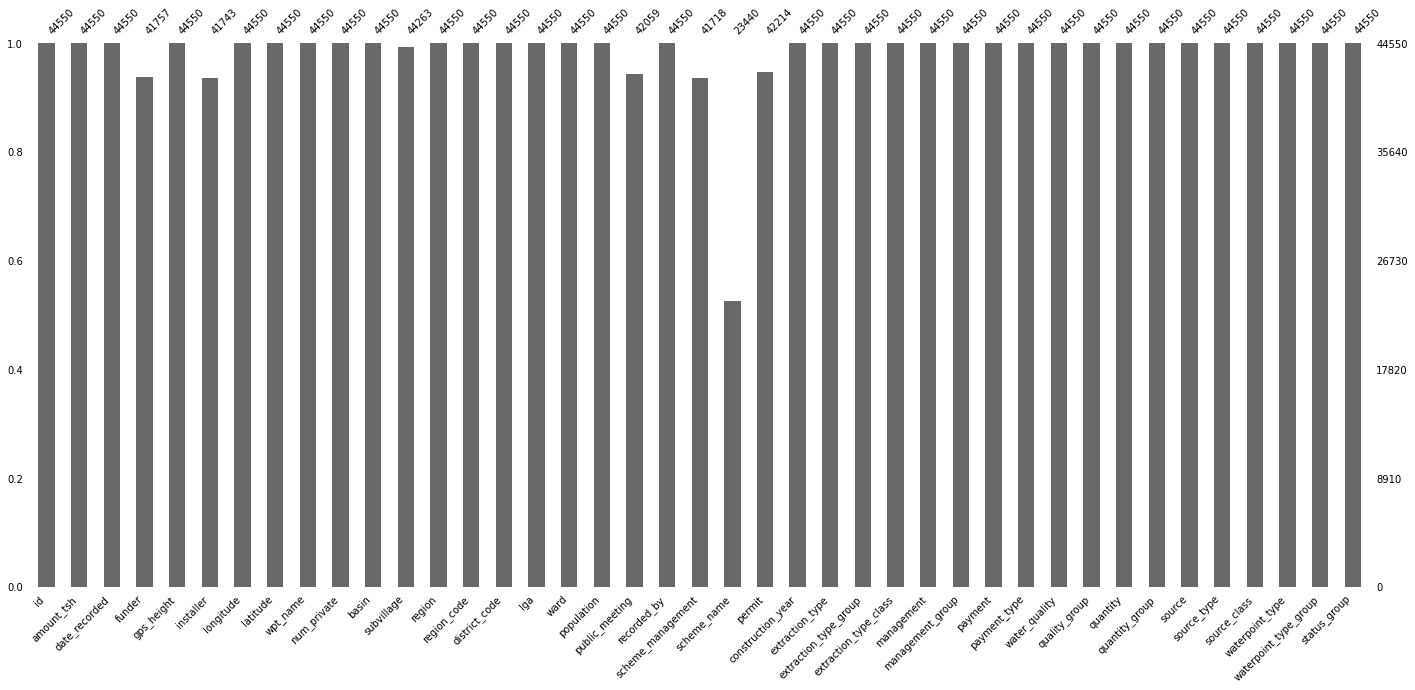

In [275]:
msno.bar(train_df, labels=True,fontsize=10)

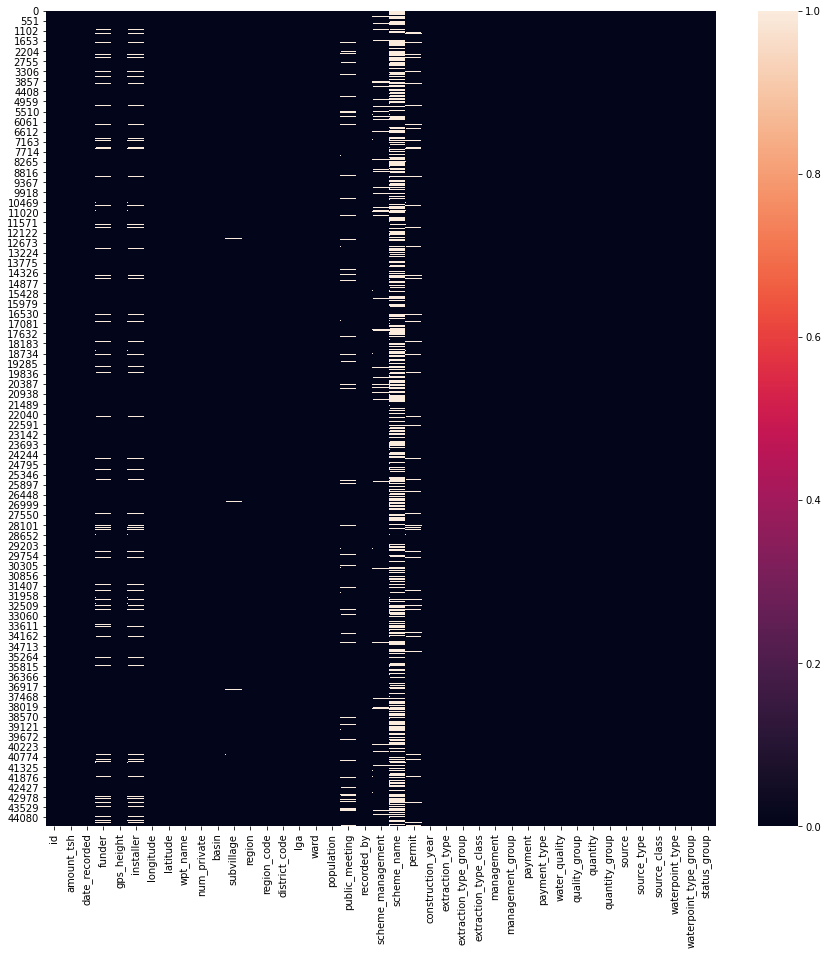

In [276]:
plt.figure(figsize=(15,15))
sns.heatmap(train_df.isnull())

In [277]:
#finding out cols with significant no. of Missing Vals
null_col_names = []

for col in train_df.columns.values: # For each column
  if train_df[col].isnull().sum()>20:
   print('{col_name} has {num} null entries.'.format(col_name=col, num = str(train_df[col].isnull().sum())))
   null_col_names.append(col)
print('\nColumns to delete: {}'.format(null_col_names))


funder has 2793 null entries.
installer has 2807 null entries.
subvillage has 287 null entries.
public_meeting has 2491 null entries.
scheme_management has 2832 null entries.
scheme_name has 21110 null entries.
permit has 2336 null entries.

Columns to delete: ['funder', 'installer', 'subvillage', 'public_meeting', 'scheme_management', 'scheme_name', 'permit']


In [278]:
#Finding out rows with significant no. of missing values ,we are putting a threshold of 10 missing values
null_sum = train_df.isnull().sum(axis=1).tolist()
null_row_indices = [index for index, val in enumerate(null_sum) if val > 10] 
for row in null_row_indices:
 print('Row {row} has  {num} null values'.format(row = row, num = str(null_sum[row]) ))
print('\n')
print('Rows to delete: {}'.format(null_row_indices))



Rows to delete: []


In [279]:
#Checking for duplicates
train_df_dupe = train_df[train_df.duplicated()]
train_df_dupe

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group


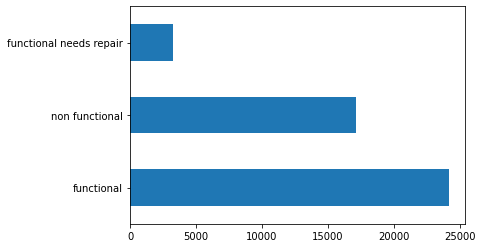

In [280]:
train_df.status_group.value_counts().plot(kind='barh')

In [281]:
train_df.construction_year = pd.to_numeric(train_df.construction_year)

In [282]:
train_df.loc[train_df.construction_year <= 0, train_df.columns=='construction_year'] = 1950

In [283]:
hist1=train_df[train_df.status_group == 'functional'].construction_year
hist2=train_df[train_df.status_group == 'functional needs repair'].construction_year
hist3=train_df[train_df.status_group == 'non functional'].construction_year

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


Text(0.5, 0, 'Construction Year')

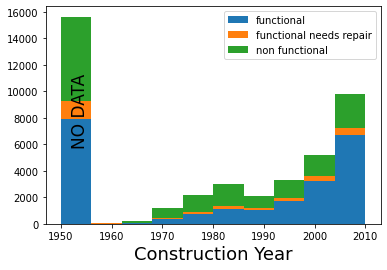

In [284]:
n,b,p=plt.hist([hist1, hist2, hist3], stacked=True,range=[1950,2010])
plt.legend(['functional','functional needs repair','non functional'],loc=0)
plt.text(1952, 6000,'NO DATA',fontsize=17,rotation=90,color='black')
plt.xlabel('Construction Year', fontsize=18)



## Data Preprocessing

In [285]:
train_df.funder.value_counts()

Government Of Tanzania    6780
Danida                    2362
Hesawa                    1639
Rwssp                     1032
Kkkt                       964
                          ... 
Nyangere                     1
Vwt                          1
Mbwana Omari                 1
Un/wfp                       1
Rajab Seleman                1
Name: funder, Length: 1651, dtype: int64

In [286]:
def funder_wrangler(row):
  '''Keep top 5 funders and setting rest as others'''
  if row['funder']=='Government Of Tanzania':
      return 'gov'
  elif row['funder']=='Danida':
      return 'danida'
  elif row['funder']=='Hesawa':
      return 'hesawa'
  elif row['funder']=='Rwssp':
      return 'rwssp'
  elif row['funder']=='World Bank':
      return 'world_bank'    
  else:
      return 'other'

train_df['funder'] = train_df.apply(lambda row: funder_wrangler(row), axis=1)

In [287]:
# Add column named 'status_group_vals' to allow the use of a pivot table to check differences
# between the different funders.

vals_to_replace = {'functional':2, 'functional needs repair':1,'non functional':0}

train_df['status_group_vals']  = train_df.status_group.replace(vals_to_replace)

In [288]:
train_df

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group,status_group_vals
0,7411,7.0,2013-03-20,other,1203,CES,37.228664,-3.256505,Kwa Abdalla,0,Pangani,Mafurini,Kilimanjaro,3,5,Hai,Machame Kaskazini,90,True,GeoData Consultants Ltd,Water Board,Machame water supply,True,2008,gravity,gravity,gravity,water board,user-group,pay per bucket,per bucket,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional,2
1,18014,0.0,2011-02-21,other,1409,CDTF,34.615481,-9.972601,none,0,Lake Nyasa,Ituni,Iringa,11,5,Ludewa,Luana,70,False,GeoData Consultants Ltd,Private operator,Mgowel,False,1984,gravity,gravity,gravity,private operator,commercial,never pay,never pay,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional,2
2,26103,0.0,2013-01-04,gov,1572,DWE,36.658778,-3.321529,Kwa Loishiye,0,Pangani,Melebuki,Arusha,2,2,Arusha Rural,Kimnyaki,150,True,GeoData Consultants Ltd,VWC,Saitero olosaita pipe line,True,2002,gravity,gravity,gravity,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe,non functional,0
3,31140,0.0,2011-04-03,other,0,District Council,33.628025,-8.860795,Mwanzechele,0,Rufiji,Darajani,Mbeya,12,2,Mbeya Rural,Inyala,0,True,GeoData Consultants Ltd,VWC,NaN,True,1950,gravity,gravity,gravity,wug,user-group,pay annually,annually,soft,good,insufficient,insufficient,river,river/lake,surface,communal standpipe,communal standpipe,functional,2
4,12286,300.0,2013-03-08,other,1283,District Council,37.655509,-3.669777,Kwa Kidaya,0,Pangani,Mwira A,Kilimanjaro,3,2,Mwanga,Shinghatini,34,True,GeoData Consultants Ltd,VWC,Churu water supply,False,2007,gravity,gravity,gravity,vwc,user-group,pay monthly,monthly,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe,functional,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44545,43878,0.0,2013-01-23,other,0,TAWASA,32.383715,-3.457624,Imalabuluhi,0,Lake Tanganyika,Bukenge,Shinyanga,17,3,Kahama,Segese,0,True,GeoData Consultants Ltd,NaN,NaN,True,1950,nira/tanira,nira/tanira,handpump,wug,user-group,unknown,unknown,milky,milky,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump,functional,2
44546,50718,0.0,2011-07-25,other,0,DED,31.615509,-2.738682,Ilyamchele Center,0,Lake Victoria,Ilyamchele Center,Kagera,18,8,Chato,Katende,0,True,GeoData Consultants Ltd,WUA,NaN,True,1950,afridev,afridev,handpump,wua,user-group,pay monthly,monthly,soft,good,enough,enough,hand dtw,borehole,groundwater,hand pump,hand pump,non functional,0
44547,67177,0.0,2013-02-23,gov,969,Government,35.134412,-10.676062,Kwa Mzee Maondo,0,Ruvuma / Southern Coast,Masango,Ruvuma,10,3,Mbinga,Kigonsera,60,NaN,GeoData Consultants Ltd,VWC,Government,NaN,1977,gravity,gravity,gravity,vwc,user-group,unknown,unknown,soft,good,seasonal,seasonal,spring,spring,groundwater,communal standpipe,communal standpipe,functional,2
44548,2744,200.0,2013-03-26,other,1269,ADRA/Government,37.886287,-4.390882,Miembeni,0,Pangani,Mng'Ende,Kilimanjaro,3,3,Same,Suji,80,True,GeoData Consultants Ltd,Water authority,Kiumba water supply,True,2011,gravity,gravity,gravity,vwc,user-group,pay monthly,monthly,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe,functional,2


In [289]:
piv_table = pd.pivot_table(train_df,index=['funder','status_group'],values='status_group_vals', aggfunc='count')
print(piv_table)

                                    status_group_vals
funder     status_group                              
danida     functional                            1282
           functional needs repair                119
           non functional                         961
gov        functional                            2781
           functional needs repair                519
...                                               ...
rwssp      functional needs repair                 80
           non functional                         343
world_bank functional                             399
           functional needs repair                 73
           non functional                         490

[18 rows x 1 columns]


In [290]:
total_danida = piv_table.status_group_vals[0] + piv_table.status_group_vals[1] + piv_table.status_group_vals[2]
percent_functional_danida = (piv_table.status_group_vals[0] / total_danida) * 100

total_gov = piv_table.status_group_vals[3] + piv_table.status_group_vals[4] + piv_table.status_group_vals[5]
percent_functional_gov = (piv_table.status_group_vals[3] / total_gov) * 100

total_hesawa = piv_table.status_group_vals[6] + piv_table.status_group_vals[7] + piv_table.status_group_vals[8]
percent_functional_hesawa = (piv_table.status_group_vals[6] / total_hesawa) * 100

total_other = piv_table.status_group_vals[9] + piv_table.status_group_vals[10] + piv_table.status_group_vals[11]
percent_functional_non_gov = (piv_table.status_group_vals[9] / total_other) * 100

total_rwssp = piv_table.status_group_vals[12] + piv_table.status_group_vals[13] + piv_table.status_group_vals[14]
percent_functional_rwssp = (piv_table.status_group_vals[12] / total_rwssp) * 100

total_world_bank = piv_table.status_group_vals[15] + piv_table.status_group_vals[16] + piv_table.status_group_vals[17]
percent_functional_world_bank = (piv_table.status_group_vals[15] / total_world_bank) * 100

print('Percent functional danida: ', round(percent_functional_danida,3))
print('Percent functional gov: ', round(percent_functional_gov,3))
print('Percent functional hesawa: ', round(percent_functional_hesawa,3))
print('Percent functional non gov: ', round(percent_functional_non_gov,3))
print('Percent functional rwssp: ', round(percent_functional_rwssp,3))
print('Percent functional world bank: ', round(percent_functional_world_bank,3))

Percent functional danida:  54.276
Percent functional gov:  41.018
Percent functional hesawa:  42.221
Percent functional non gov:  58.005
Percent functional rwssp:  59.012
Percent functional world bank:  41.476


In [291]:
# There are some clear differences here that will hopefully improve the model. The next feature
# to inspect is 'installer'.

train_df.installer.value_counts()

DWE              13005
Government        1365
RWE                876
Commu              806
DANIDA             788
                 ...  
MANGO TREE           1
Raramataki           1
Privat               1
Goldmain             1
Meru Concrete        1
Name: installer, Length: 1854, dtype: int64

In [292]:
# Create a function to reduce the amount of dummy columns needed whilst maintaining the 
# information contained in the column.

def installer_wrangler(row):
    '''Keep top 5 values and set the rest to 'other'''
    if row['installer']=='DWE':
        return 'dwe'
    elif row['installer']=='Government':
        return 'gov'
    elif row['installer']=='RWE':
        return 'rwe'
    elif row['installer']=='Commu':
        return 'commu'
    elif row['installer']=='DANIDA':
        return 'danida'
    else:
        return 'other'  

train_df['installer'] = train_df.apply(lambda row: installer_wrangler(row), axis=1)

In [293]:
piv_table = pd.pivot_table(train_df,index=['installer','status_group'],values='status_group_vals', aggfunc='count')
piv_table

status_group_vals
installer status_group                              
commu     functional                             546
          functional needs repair                 27
          non functional                         233
danida    functional                             404
          functional needs repair                 64
...                                              ...
other     functional needs repair               1654
          non functional                       10503
rwe       functional                             229
          functional needs repair                 99
          non functional                         548

[18 rows x 1 columns]

In [294]:
# As was the case with 'funder' there are some clear differences here that will hopefully
# improve the model. The next feature to inspect is 'subvillage'.

print(df.subvillage.value_counts())

Madukani     508
Shuleni      506
Majengo      502
Kati         373
Mtakuja      262
            ... 
Mwamamumi      1
Kiware         1
Naamalasi      1
Qatabela       1
Nyunjwi        1
Name: subvillage, Length: 19287, dtype: int64


In [295]:
print('Number of villages: ', len(df.subvillage.value_counts()))

Number of villages:  19287


In [296]:
# 19287 unique values implies that the largest values don't dominate as was the case with installer and
# funder. It's probably not worth creating dummy variables for the top 5. I'll drop this one but
# feel free to experiment here.
if 'subvillage' in train_df.columns.values:
  train_df = train_df.drop('subvillage', axis=1)

In [297]:
# Let's investigate the next column containg null data: 'public_meeting'.

print(train_df.public_meeting.value_counts(),"\n")
# We only have two values here: true and false. This one can stay but we'll have to replace 
# the unknown data with a string value.

train_df.public_meeting = train_df.public_meeting.fillna('Unknown')

# 'scheme_management' is up next.

train_df.scheme_management.value_counts()

True     38212
False     3847
Name: public_meeting, dtype: int64 



VWC                 27651
WUG                  3906
Water authority      2361
WUA                  2166
Water Board          2078
Parastatal           1272
Private operator      792
Company               790
Other                 575
SWC                    69
Trust                  57
None                    1
Name: scheme_management, dtype: int64

In [303]:
# Create a function to reduce the amount of dummy columns needed whilst maintaining the 
# information contained in the column.

def scheme_wrangler(row):
    '''Keep top 5 values and set the rest to 'other'. '''
    if row['scheme_management']=='VWC':
        return 'vwc'
    elif row['scheme_management']=='WUG':
        return 'wug'
    elif row['scheme_management']=='Water authority':
        return 'wtr_auth'
    elif row['scheme_management']=='WUA':
        return 'wua'
    elif row['scheme_management']=='Water Board':
        return 'wtr_brd'
    else:
        return 'other'

train_df['scheme_management'] = train_df.apply(lambda row: scheme_wrangler(row), axis=1)

In [304]:
pd.set_option('display.max_rows', None)
piv_table = pd.pivot_table(train_df, index=['scheme_management', 'status_group'],values='status_group_vals', aggfunc='count')
piv_table.to_excel("Schememanagement.xlsx")
display(piv_table)
pd.set_option('display.max_rows', 15)

status_group_vals
scheme_management status_group                              
other             functional                            3455
                  functional needs repair                377
                  non functional                        2556
vwc               functional                           14242
                  functional needs repair               1777
                  non functional                       11632
wtr_auth          functional                            1208
                  functional needs repair                325
                  non functional                         828
wtr_brd           functional                            1555
                  functional needs repair                 75
                  non functional                         448
wua               functional                            1494
                  functional needs repair                183
                  non functional                         489
wug               functional                            2240
                  functional needs repair                501
                  non functional                        1165

In [305]:
total_other = piv_table.status_group_vals[0] + piv_table.status_group_vals[1] + piv_table.status_group_vals[2]
percent_functional_other = (piv_table.status_group_vals[0] / total_other) * 100

total_vwc = piv_table.status_group_vals[3] + piv_table.status_group_vals[4] + piv_table.status_group_vals[5]
percent_functional_vwc = (piv_table.status_group_vals[3] / total_vwc) * 100

total_wtr_auth = piv_table.status_group_vals[6] + piv_table.status_group_vals[7] + piv_table.status_group_vals[8]
percent_functional_wtr_auth = (piv_table.status_group_vals[6] / total_wtr_auth) * 100

total_wtr_brd = piv_table.status_group_vals[9] + piv_table.status_group_vals[10] + piv_table.status_group_vals[11]
percent_functional_wtr_brd = (piv_table.status_group_vals[9] / total_wtr_brd) * 100

total_wua = piv_table.status_group_vals[12] + piv_table.status_group_vals[13] + piv_table.status_group_vals[14]
percent_functional_wua = (piv_table.status_group_vals[12] / total_wua) * 100

total_wug = piv_table.status_group_vals[15] + piv_table.status_group_vals[16] + piv_table.status_group_vals[17]
percent_functional_wug = (piv_table.status_group_vals[15] / total_wug) * 100

print('Percent functional other: ', round(percent_functional_other,3))
print('Percent functional vwc: ', round(percent_functional_vwc,3))
print('Percent functional water authority: ', round(percent_functional_wtr_auth,3))
print('Percent functional water board: ', round(percent_functional_wtr_brd,3))
print('Percent functional wua: ', round(percent_functional_wua,3))
print('Percent functional wug: ', round(percent_functional_wug,3))

Percent functional other:  54.086
Percent functional vwc:  51.506
Percent functional water authority:  51.165
Percent functional water board:  74.832
Percent functional wua:  68.975
Percent functional wug:  57.348


In [306]:
train_df.scheme_name.value_counts()

K                                      528
None                                   494
Borehole                               402
M                                      310
Chalinze wate                          300
                                      ... 
Gwarama point  sources water supply      1
Mtumbei mpopera                          1
Marua mshatie water supply               1
Mand                                     1
Mongwe r                                 1
Name: scheme_name, Length: 2506, dtype: int64

In [307]:
len(train_df.scheme_name.unique())

# Lots of factors and the top 5 or so only represent a fraction of the total values. Probably 
# safe to drop this column.

train_df = train_df.drop('scheme_name', axis=1)

In [308]:
# The final column containing nulls is 'permit'.

train_df.permit.value_counts()

True     29057
False    13157
Name: permit, dtype: int64

In [309]:
# We only have two values here: true and false. This one can stay but we'll have to replace 
# the unknown data with a string value.

train_df.permit = train_df.permit.fillna('Unknown')

In [312]:
pd.set_option('display.max_rows', None)
print(train_df.apply(lambda x: sum(x.isnull())))
pd.set_option('display.max_rows', 15)

id                       0
amount_tsh               0
date_recorded            0
funder                   0
gps_height               0
installer                0
longitude                0
latitude                 0
wpt_name                 0
num_private              0
basin                    0
region                   0
region_code              0
district_code            0
lga                      0
ward                     0
population               0
public_meeting           0
recorded_by              0
scheme_management        0
permit                   0
construction_year        0
extraction_type          0
extraction_type_group    0
extraction_type_class    0
management               0
management_group         0
payment                  0
payment_type             0
water_quality            0
quality_group            0
quantity                 0
quantity_group           0
source                   0
source_type              0
source_class             0
waterpoint_type          0
w

In [313]:
# Excellent! Now there are no nulls in the data set. We can move on to look at columns with 
# string values and modify or remove them as we see fit.

str_cols = train_df.select_dtypes(include = ['object'])
str_cols.apply(lambda x: len(x.unique()))

date_recorded              346
funder                       6
installer                    6
wpt_name                 28991
basin                        9
                         ...  
source_type                  7
source_class                 3
waterpoint_type              7
waterpoint_type_group        6
status_group                 3
Length: 29, dtype: int64

In [314]:
# 'Date recorded'

train_df.date_recorded.describe()

count          44550
unique           346
top       2011-03-15
freq             423
Name: date_recorded, dtype: object

In [315]:
# Let's first convert the column to type datetime. Then change the column to represent the 
# number of days since the most recently recorded datum we have. The idea being that more 
# recently recorded pumps might be more likely to be functional than non-functional. 

train_df.date_recorded = pd.to_datetime(train_df.date_recorded)
train_df.date_recorded.describe()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  


count                   44550
unique                    346
top       2011-03-15 00:00:00
freq                      423
first     2002-10-14 00:00:00
last      2013-12-03 00:00:00
Name: date_recorded, dtype: object

In [316]:
# The most recent data is 2013-12-03. Subtract each date from this point to obtain a 
# 'days_since_recorded' column.

train_df.date_recorded = pd.datetime(2013, 12, 3) - pd.to_datetime(train_df.date_recorded)
train_df.columns = ['days_since_recorded' if x=='date_recorded' else x for x in train_df.columns]
train_df.days_since_recorded = train_df.days_since_recorded.astype('timedelta64[D]').astype(int)
train_df.days_since_recorded.describe()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  after removing the cwd from sys.path.


count    44550.000000
mean       615.289809
std        333.898570
min          0.000000
25%        297.000000
50%        420.000000
75%        977.000000
max       4068.000000
Name: days_since_recorded, dtype: float64

In [317]:
# There's a wide range of data here hopefully it will help improve the predictive power of our
# models. Next up for inspection is 'wpt_name' (Name of the waterpoint if there is one).

df.wpt_name.value_counts()



none                     3563
Shuleni                  1748
Zahanati                  830
Msikitini                 535
Kanisani                  323
                         ... 
Kwa Martini Moheda          1
Rwatankororo                1
Dulu                        1
Kwa Mkwenya                 1
Kwa Jerry Mwambambale       1
Name: wpt_name, Length: 37400, dtype: int64

In [318]:
# Due to the huge number of factors and the lack of a clear dominating value I'll drop this.
# I may come back and include the top 5 later. Next up is 'basin'.

train_df = train_df.drop('wpt_name', axis=1)

In [319]:
train_df.basin.value_counts()

Lake Victoria              7623
Pangani                    6703
Rufiji                     6045
Internal                   5855
Lake Tanganyika            4775
Wami / Ruvu                4430
Lake Nyasa                 3902
Ruvuma / Southern Coast    3381
Lake Rukwa                 1836
Name: basin, dtype: int64

In [322]:
pd.set_option('display.max_rows', None)
piv_table = pd.pivot_table(train_df, index=['basin', 'status_group'],values=['status_group_vals'], aggfunc='count')
display(piv_table)
pd.set_option('display.max_rows', 15)

status_group_vals
basin                   status_group                              
Internal                functional                            3379
                        functional needs repair                420
                        non functional                        2056
Lake Nyasa              functional                            2525
                        functional needs repair                195
                        non functional                        1182
Lake Rukwa              functional                             748
                        functional needs repair                203
                        non functional                         885
Lake Tanganyika         functional                            2318
                        functional needs repair                545
                        non functional                        1912
Lake Victoria           functional                            3793
                        functional needs repair                741
                        non functional                        3089
Pangani                 functional                            4021
                        functional needs repair                352
                        non functional                        2330
Rufiji                  functional                            3836
                        functional needs repair                338
                        non functional                        1871
Ruvuma / Southern Coast functional                            1268
                        functional needs repair                237
                        non functional                        1876
Wami / Ruvu             functional                            2306
                        functional needs repair                207
                        non functional                        1917



Most basins have have more functional than non-functional pumps. Lake Rukwa and Ruvuma don't. All the values are over 2000 so this looks like a good feature to keep. Region will be considered next.



In [323]:
train_df.region.value_counts()

Iringa           4017
Shinyanga        3719
Mbeya            3609
Kilimanjaro      3307
Morogoro         2961
                 ... 
Rukwa            1353
Mtwara           1308
Manyara          1172
Lindi            1152
Dar es Salaam     593
Name: region, Length: 21, dtype: int64

In [324]:
# Both basin, lga, ward and region contain geographical information so there is a risk of them being
# highly correlated with each other. I'll drop then for now.
# They could be be worth including though, so I may come back to them.
train_df = train_df.drop(['region', 'lga', 'ward'], axis=1)

In [325]:
train_df.recorded_by.value_counts()

GeoData Consultants Ltd    44550
Name: recorded_by, dtype: int64

In [326]:
# All data points have the same value so this offers no information that would help build our
# model.
train_df = train_df.drop('recorded_by', axis=1)

In [327]:
# extraction_type, extraction_type_group and extraction_type_class appear to contain very similar
# data. I'll drop the first two and keep the last one.

train_df = train_df.drop(['extraction_type', 'extraction_type_group'], axis=1)

In [328]:
train_df.management.value_counts()

vwc                 30371
wug                  4874
water board          2221
wua                  1907
private operator     1485
parastatal           1347
water authority       677
other                 622
company               512
unknown               402
other - school         70
trust                  62
Name: management, dtype: int64

In [329]:
# This appears to be almost identical to 'scheme_management'. I'll drop it.

train_df = train_df.drop('management', axis=1)

In [331]:
train_df.management_group.value_counts()

user-group    39373
commercial     2736
parastatal     1347
other           692
unknown         402
Name: management_group, dtype: int64

In [332]:
# Appears to offer no new info and is likely to overlap with 'scheme_management'.

train_df = train_df.drop('management_group', axis=1)

In [333]:
train_df.payment.value_counts()

never pay                19002
pay per bucket            6808
pay monthly               6182
unknown                   6104
pay when scheme fails     2941
pay annually              2717
other                      796
Name: payment, dtype: int64

In [334]:
train_df.payment_type.value_counts()

never pay     19002
per bucket     6808
monthly        6182
unknown        6104
on failure     2941
annually       2717
other           796
Name: payment_type, dtype: int64

In [335]:
# Payment and payment_type contain identical data. Remove one and keep the other.

train_df = train_df.drop('payment', axis=1)

In [336]:
train_df.water_quality.value_counts()

soft                  38093
salty                  3668
unknown                1397
milky                   606
coloured                364
salty abandoned         264
fluoride                147
fluoride abandoned       11
Name: water_quality, dtype: int64

In [337]:
train_df.quality_group.value_counts()

good        38093
salty        3932
unknown      1397
milky         606
colored       364
fluoride      158
Name: quality_group, dtype: int64

In [338]:
# Water_quality and quality_group contain identical data. Remove one and keep the other.

train_df = train_df.drop('quality_group', 1)

In [339]:
train_df.quantity.value_counts()

enough          24821
insufficient    11367
dry              4725
seasonal         3049
unknown           588
Name: quantity, dtype: int64

In [340]:
train_df.quantity_group.value_counts()

enough          24821
insufficient    11367
dry              4725
seasonal         3049
unknown           588
Name: quantity_group, dtype: int64

In [341]:
# Quantity and quantity_group contain identical data. Remove one and keep the other.

train_df = train_df.drop('quantity_group', 1)

In [342]:
train_df.source.value_counts()

spring                  12889
shallow well            12618
machine dbh              8282
river                    7135
rainwater harvesting     1739
hand dtw                  652
lake                      544
dam                       489
other                     156
unknown                    46
Name: source, dtype: int64

In [343]:
train_df.source_class.value_counts()

groundwater    34441
surface         9907
unknown          202
Name: source_class, dtype: int64

In [344]:
train_df.source_type.value_counts()

spring                  12889
shallow well            12618
borehole                 8934
river/lake               7679
rainwater harvesting     1739
dam                       489
other                     202
Name: source_type, dtype: int64

In [345]:
# Source and source_type contain very similar information. Remove one and keep the other.

train_df = train_df.drop('source', axis=1)

In [350]:
# gps_height, longitude, latitude, region_code and district_code are all geographic info which
# is unlikely to add any predictive power to the model given that there are other variables
# containing geographic data. We expect id to not contain any useful information so that gets
# dropped too.

train_df = train_df.drop(['gps_height', 'longitude', 'latitude', 'region_code', 'district_code', 'id'], axis=1)

In [372]:
train_df = train_df.drop('num_private',axis=1)

In [351]:
pd.set_option('display.max_rows', None)
print(str_cols.apply(lambda x: len(x.unique())))
pd.set_option('display.max_rows', 15)

date_recorded              346
funder                       6
installer                    6
wpt_name                 28991
basin                        9
region                      21
lga                        125
ward                      2080
public_meeting               3
recorded_by                  1
scheme_management            6
permit                       3
extraction_type             18
extraction_type_group       13
extraction_type_class        7
management                  12
management_group             5
payment                      7
payment_type                 7
water_quality                8
quality_group                6
quantity                     5
quantity_group               5
source                      10
source_type                  7
source_class                 3
waterpoint_type              7
waterpoint_type_group        6
status_group                 3
dtype: int64


In [352]:
train_df.construction_year.value_counts()

1950    15641
2010     1991
2008     1935
2009     1928
2000     1575
        ...  
1964       31
1962       28
1961       17
1966       14
1965       11
Name: construction_year, Length: 55, dtype: int64

In [353]:
# Turn construction_year into a categorical column containing the following values: '60s', '70s',
# '80s', '90s, '00s', '10s', 'unknown'.

def construction_wrangler(row):
  if row['construction_year'] >= 1960 and row['construction_year'] < 1970:
    return '60s'
  elif row['construction_year'] >= 1970 and row['construction_year'] < 1980:
    return '70s'
  elif row['construction_year'] >= 1980 and row['construction_year'] < 1990:
    return '80s'
  elif row['construction_year'] >= 1990 and row['construction_year'] < 2000:
    return '90s'
  elif row['construction_year'] >= 2000 and row['construction_year'] < 2010:
    return '00s'
  elif row['construction_year'] >= 2010:
    return '10s'
  else:
    return 'unknown'
    
train_df['construction_year'] = train_df.apply(lambda row: construction_wrangler(row), axis=1)

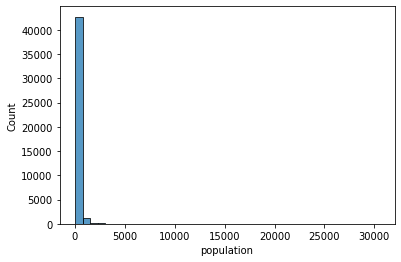

In [356]:
sns.histplot(train_df.population, bins = 40)
plt.show()

In [357]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44550 entries, 0 to 44549
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   amount_tsh             44550 non-null  float64
 1   days_since_recorded    44550 non-null  int64  
 2   funder                 44550 non-null  object 
 3   installer              44550 non-null  object 
 4   num_private            44550 non-null  int64  
 5   basin                  44550 non-null  object 
 6   population             44550 non-null  int64  
 7   public_meeting         44550 non-null  object 
 8   scheme_management      44550 non-null  object 
 9   permit                 44550 non-null  object 
 10  construction_year      44550 non-null  object 
 11  extraction_type_class  44550 non-null  object 
 12  payment_type           44550 non-null  object 
 13  water_quality          44550 non-null  object 
 14  quantity               44550 non-null  object 
 15  so

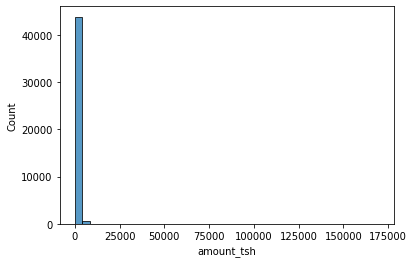

In [360]:
# Most wells have a few hundred people living around them. There are some wells
# serving huge populations. This may skew the data.
sns.histplot(train_df.amount_tsh, bins = 40)
plt.show()

In [361]:
# This plot measures the amount of water available at the pump. It looks a lot like the 
# population graph which makes sense. 

train_df.population.describe()

count    44550.000000
mean       179.112750
std        478.995645
min          0.000000
25%          0.000000
50%         25.000000
75%        210.000000
max      30500.000000
Name: population, dtype: float64

In [362]:
train_df.amount_tsh.describe()

count     44550.000000
mean        307.623224
std        2402.742799
min           0.000000
25%           0.000000
50%           0.000000
75%          20.000000
max      170000.000000
Name: amount_tsh, dtype: float64

In [363]:
# There appears to be enough variation between the two to warrant keeping them in the model.
# Let's save the dataframe to a new csv file. We'll start creating models in the next notebooks.
train_df = train_df.drop('status_group_vals', 1)
train_df.to_csv('pump_train_for_models.csv', index=False)

In [393]:
# We'll also need to perform the same modifications to the test set.

test_df = test_df.drop(['gps_height', 'longitude', 'latitude', 'region_code', 'district_code','num_private', 'id', 'payment', 'management_group', 'management', 'extraction_type', 'extraction_type_group', 'recorded_by','region', 'lga','ward', 'wpt_name', 'scheme_name', 'subvillage', 'quantity_group','quality_group', 'source'], axis=1)

In [394]:
test_df.date_recorded = pd.datetime(2013, 12, 3) - pd.to_datetime(test_df.date_recorded)
test_df.columns = ['days_since_recorded' if x=='date_recorded' else x for x in test_df.columns]
test_df.days_since_recorded = test_df.days_since_recorded.astype('timedelta64[D]').astype(int)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  """Entry point for launching an IPython kernel.


In [395]:
test_df.permit = test_df.permit.fillna('Unknown')
test_df.public_meeting = test_df.public_meeting.fillna('Unknown')

In [396]:
test_df['scheme_management'] = test_df.apply(lambda row: scheme_wrangler(row), axis=1)
test_df['construction_year'] = test_df.apply(lambda row: construction_wrangler(row), axis=1)
test_df['installer'] = test_df.apply(lambda row: installer_wrangler(row), axis=1)
test_df['funder'] = test_df.apply(lambda row: funder_wrangler(row), axis=1)

In [397]:
train_df.shape

(44550, 94)

In [371]:
pd.set_option('display.max_rows', 30)
display(train_df)
pd.set_option('display.max_rows', 15)

,amount_tsh,days_since_recorded,funder,installer,num_private,basin,population,public_meeting,scheme_management,permit,construction_year,extraction_type_class,payment_type,water_quality,quantity,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,7.0,258,other,other,0,Pangani,90,True,wtr_brd,True,00s,gravity,per bucket,soft,enough,spring,groundwater,communal standpipe,communal standpipe,functional
1,0.0,1016,other,other,0,Lake Nyasa,70,False,other,False,80s,gravity,never pay,soft,enough,spring,groundwater,communal standpipe,communal standpipe,functional
2,0.0,333,gov,dwe,0,Pangani,150,True,vwc,True,00s,gravity,never pay,soft,insufficient,spring,groundwater,communal standpipe,communal standpipe,non functional
3,0.0,975,other,other,0,Rufiji,0,True,vwc,True,unknown,gravity,annually,soft,insufficient,river/lake,surface,communal standpipe,communal standpipe,functional
4,300.0,270,other,other,0,Pangani,34,True,vwc,False,00s,gravity,monthly,soft,insufficient,spring,groundwater,communal standpipe,communal standpipe,functional
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44545,0.0,314,other,other,0,Lake Tanganyika,0,True,other,True,unknown,handpump,unknown,milky,enough,shallow well,groundwater,hand pump,hand pump,functional
44546,0.0,862,other,other,0,Lake Victoria,0,True,wua,True,unknown,handpump,monthly,soft,enough,borehole,groundwater,hand pump,hand pump,non functional
44547,0.0,283,gov,gov,0,Ruvuma / Southern Coast,60,Unknown,vwc,Unknown,70s,gravity,unknown,soft,seasonal,spring,groundwater,communal standpipe,communal standpipe,functional
44548,200.0,252,other,other,0,Pangani,80,True,wtr_auth,True,10s,gravity,monthly,soft,insufficient,spring,groundwater,communal standpipe,communal standpipe,functional


In [369]:
test_df.shape

(14850, 19)

In [373]:
# The train and test sets match up. We can save the test set now.

test_df.to_csv('pump_test_for_models.csv', index=False)

# ML Models & Prediction

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [ ]:
%rm -rf ML-Assignment-data
!git clone https://github.com/py-here/ML-Assignment-data

Cloning into 'ML-Assignment-data'...
remote: Enumerating objects: 13, done.
remote: Counting objects: 100% (13/13), done.
remote: Compressing objects: 100% (11/11), done.
remote: Total 13 (delta 3), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (13/13), done.


In [ ]:
train_df = pd.read_csv("/content/ML-Assignment-data/pump_train_for_models.csv")
test_df = pd.read_csv("/content/ML-Assignment-data/pump_test_for_models.csv")

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44550 entries, 0 to 44549
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   amount_tsh             44550 non-null  float64
 1   days_since_recorded    44550 non-null  int64  
 2   funder                 44550 non-null  object 
 3   installer              44550 non-null  object 
 4   num_private            44550 non-null  int64  
 5   basin                  44550 non-null  object 
 6   population             44550 non-null  int64  
 7   public_meeting         44550 non-null  object 
 8   scheme_management      44550 non-null  object 
 9   permit                 44550 non-null  object 
 10  construction_year      44550 non-null  object 
 11  extraction_type_class  44550 non-null  object 
 12  payment_type           44550 non-null  object 
 13  water_quality          44550 non-null  object 
 14  quantity               44550 non-null  object 
 15  so

In [ ]:
# Get dummy columns for the categorical columns and shuffle the data.

dummy_cols = ['funder', 'installer', 'basin', 'public_meeting', 'scheme_management', 'permit',
              'construction_year', 'extraction_type_class', 'payment_type', 'water_quality',
              'quantity', 'source_type', 'source_class', 'waterpoint_type',
              'waterpoint_type_group']

train_df = pd.get_dummies(train_df, columns = dummy_cols)

train_df = train_df.sample(frac=1).reset_index(drop=True)

In [ ]:
print(train_df.shape)
train_df.head()

(44550, 95)


,amount_tsh,days_since_recorded,num_private,population,status_group,funder_danida,funder_gov,funder_hesawa,funder_other,funder_rwssp,funder_world_bank,installer_commu,installer_danida,installer_dwe,installer_gov,installer_other,installer_rwe,basin_Internal,basin_Lake Nyasa,basin_Lake Rukwa,basin_Lake Tanganyika,basin_Lake Victoria,basin_Pangani,basin_Rufiji,basin_Ruvuma / Southern Coast,basin_Wami / Ruvu,public_meeting_False,public_meeting_True,public_meeting_Unknown,scheme_management_other,scheme_management_vwc,scheme_management_wtr_auth,scheme_management_wtr_brd,scheme_management_wua,scheme_management_wug,permit_False,permit_True,permit_Unknown,construction_year_00s,construction_year_10s,...,payment_type_on failure,payment_type_other,payment_type_per bucket,payment_type_unknown,water_quality_coloured,water_quality_fluoride,water_quality_fluoride abandoned,water_quality_milky,water_quality_salty,water_quality_salty abandoned,water_quality_soft,water_quality_unknown,quantity_dry,quantity_enough,quantity_insufficient,quantity_seasonal,quantity_unknown,source_type_borehole,source_type_dam,source_type_other,source_type_rainwater harvesting,source_type_river/lake,source_type_shallow well,source_type_spring,source_class_groundwater,source_class_surface,source_class_unknown,waterpoint_type_cattle trough,waterpoint_type_communal standpipe,waterpoint_type_communal standpipe multiple,waterpoint_type_dam,waterpoint_type_hand pump,waterpoint_type_improved spring,waterpoint_type_other,waterpoint_type_group_cattle trough,waterpoint_type_group_communal standpipe,waterpoint_type_group_dam,waterpoint_type_group_hand pump,waterpoint_type_group_improved spring,waterpoint_type_group_other
0,0.0,281,0,400,non functional,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,...,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
1,0.0,272,0,203,functional,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
2,300.0,268,0,380,non functional,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1
3,0.0,961,0,0,functional needs repair,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
4,50.0,265,0,150,functional,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,1,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0


In [ ]:
test_df = pd.get_dummies(test_df, columns = dummy_cols)

In [ ]:
print(test_df.shape)
test_df.head()

(14850, 94)


,Unnamed: 0,amount_tsh,days_since_recorded,population,funder_danida,funder_gov,funder_hesawa,funder_other,funder_rwssp,funder_world_bank,installer_commu,installer_danida,installer_dwe,installer_gov,installer_other,installer_rwe,basin_Internal,basin_Lake Nyasa,basin_Lake Rukwa,basin_Lake Tanganyika,basin_Lake Victoria,basin_Pangani,basin_Rufiji,basin_Ruvuma / Southern Coast,basin_Wami / Ruvu,public_meeting_False,public_meeting_True,public_meeting_Unknown,scheme_management_other,scheme_management_vwc,scheme_management_wtr_auth,scheme_management_wtr_brd,scheme_management_wua,scheme_management_wug,permit_False,permit_True,permit_Unknown,construction_year_00s,construction_year_10s,construction_year_60s,...,payment_type_on failure,payment_type_other,payment_type_per bucket,payment_type_unknown,water_quality_coloured,water_quality_fluoride,water_quality_fluoride abandoned,water_quality_milky,water_quality_salty,water_quality_salty abandoned,water_quality_soft,water_quality_unknown,quantity_dry,quantity_enough,quantity_insufficient,quantity_seasonal,quantity_unknown,source_type_borehole,source_type_dam,source_type_other,source_type_rainwater harvesting,source_type_river/lake,source_type_shallow well,source_type_spring,source_class_groundwater,source_class_surface,source_class_unknown,waterpoint_type_cattle trough,waterpoint_type_communal standpipe,waterpoint_type_communal standpipe multiple,waterpoint_type_dam,waterpoint_type_hand pump,waterpoint_type_improved spring,waterpoint_type_other,waterpoint_type_group_cattle trough,waterpoint_type_group_communal standpipe,waterpoint_type_group_dam,waterpoint_type_group_hand pump,waterpoint_type_group_improved spring,waterpoint_type_group_other
0,0,0.0,1012,769,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
1,1,0.0,961,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
2,2,0.0,982,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
3,3,0.0,873,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
4,4,0.0,856,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0


In [ ]:
test_df.head()

,Unnamed: 0,amount_tsh,days_since_recorded,population,funder_danida,funder_gov,funder_hesawa,funder_other,funder_rwssp,funder_world_bank,installer_commu,installer_danida,installer_dwe,installer_gov,installer_other,installer_rwe,basin_Internal,basin_Lake Nyasa,basin_Lake Rukwa,basin_Lake Tanganyika,basin_Lake Victoria,basin_Pangani,basin_Rufiji,basin_Ruvuma / Southern Coast,basin_Wami / Ruvu,public_meeting_False,public_meeting_True,public_meeting_Unknown,scheme_management_other,scheme_management_vwc,scheme_management_wtr_auth,scheme_management_wtr_brd,scheme_management_wua,scheme_management_wug,permit_False,permit_True,permit_Unknown,construction_year_00s,construction_year_10s,construction_year_60s,...,payment_type_on failure,payment_type_other,payment_type_per bucket,payment_type_unknown,water_quality_coloured,water_quality_fluoride,water_quality_fluoride abandoned,water_quality_milky,water_quality_salty,water_quality_salty abandoned,water_quality_soft,water_quality_unknown,quantity_dry,quantity_enough,quantity_insufficient,quantity_seasonal,quantity_unknown,source_type_borehole,source_type_dam,source_type_other,source_type_rainwater harvesting,source_type_river/lake,source_type_shallow well,source_type_spring,source_class_groundwater,source_class_surface,source_class_unknown,waterpoint_type_cattle trough,waterpoint_type_communal standpipe,waterpoint_type_communal standpipe multiple,waterpoint_type_dam,waterpoint_type_hand pump,waterpoint_type_improved spring,waterpoint_type_other,waterpoint_type_group_cattle trough,waterpoint_type_group_communal standpipe,waterpoint_type_group_dam,waterpoint_type_group_hand pump,waterpoint_type_group_improved spring,waterpoint_type_group_other
0,0,0.0,1012,769,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
1,1,0.0,961,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
2,2,0.0,982,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
3,3,0.0,873,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
4,4,0.0,856,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0


In [ ]:
# Let's split the train set into train and validation sets. Also remove the target.

target = train_df.status_group
features = train_df.drop('status_group', axis=1)

X_train, X_val, y_train, y_val = train_test_split(features, target, train_size=0.8)

In [ ]:
#found from random forrest classifier
major_features = ['amount_tsh','days_since_recorded','population','funder_gov',
                  'funder_other','installer_dwe','installer_other','scheme_management_vwc',
                  'permit_False','permit_True','construction_year_00s','construction_year_10s',
                  'construction_year_70s','extraction_type_class_gravity','extraction_type_class_other',
                  'payment_type_never pay','quantity_dry','quantity_enough','quantity_insufficient',
                  'waterpoint_type_communal standpipe','waterpoint_type_communal standpipe multiple',
                  'waterpoint_type_other','waterpoint_type_group_other']

In [ ]:
new_X_train = X_train[major_features]
new_X_val = X_val[major_features]

## Gradient Boosting

In [ ]:
def modelGB(X_train, X_val, y_train, y_val, test):
  if __name__ == '__main__':
   

    param_grid = {'learning_rate': [0.075,0.07],'max_depth': [6,7],'min_samples_leaf': [7,8],
                  'max_features': [1.0],'n_estimators':[100, 200]}  

    estimator = GridSearchCV(estimator=GradientBoostingClassifier(),param_grid=param_grid,n_jobs=-1)

    estimator.fit(X_train, y_train)

    best_params = estimator.best_params_
                              
    validation_accuracy = estimator.score(X_val, y_val)
    print('Validation accuracy: ', validation_accuracy)
    print(best_params)

In [ ]:
#used reduced set of features as it was taking lot of time to compute
modelGB(new_X_train, new_X_val, y_train, y_val, test_df)

Validation accuracy:  0.7734006734006734
{'learning_rate': 0.075, 'max_depth': 7, 'max_features': 1.0, 'min_samples_leaf': 7, 'n_estimators': 200}


    Validation accuracy:  0.7734006734006734
    {'learning_rate': 0.075, 'max_depth': 7, 'max_features': 1.0, 'min_samples_leaf': 7, 'n_estimators': 200}

In [ ]:
def predictGB(features, target, test):
  if __name__ == '__main__':

    param_grid = {'learning_rate': [0.075],'max_depth': [7],'min_samples_leaf': [7],
                  'max_features': [1.0],'n_estimators':[200]}  
    estimator = GridSearchCV(estimator=GradientBoostingClassifier(),param_grid=param_grid)
    estimator.fit(features, target)        

    predictions = estimator.predict(test)
    data = { 'status_group': predictions}

    result = pd.DataFrame(data=data)

    vals_to_replace = {2:'functional', 1:'functional needs repair', 0:'non functional'}
    result.status_group = result.status_group.replace(vals_to_replace)        

    result.to_csv('pump_predictions_GB.csv', index=False)

In [ ]:
# Run model for prediction

predictGB(features, target, test_df)


## Linear SVC

Both the train and test set are ready for modelling. Start off with a Linear Support Vector Classification.

Ref Link: http://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html

In [ ]:
def modelSVC(X_train, X_val, y_train, y_val, test):
  if __name__ == '__main__':

    pipe = Pipeline([('scl', StandardScaler()), ('clf', LinearSVC())])

    param_grid = {'clf__C':[0.01, 0.1],'clf__class_weight':[None,'balanced']}

    estimator = GridSearchCV(estimator=pipe,param_grid=param_grid,n_jobs=-1)

    estimator.fit(X_train, y_train)

    best_params = estimator.best_params_
                              
    validation_accuracy = estimator.score(X_val, y_val)
    print('Validation accuracy: ', validation_accuracy)
    print(best_params)

In [ ]:
modelSVC(X_train, X_val, y_train, y_val, test_df)

Validation accuracy:  0.7306397306397306
{'clf__C': 0.01, 'clf__class_weight': None}


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


    Validation accuracy:  0.7306397306397306
    {'clf__C': 0.01, 'clf__class_weight': None}

In [ ]:
def predictSVC(features, target, test):
  if __name__ == '__main__':

    pipe = Pipeline([('scl', StandardScaler()), ('clf', LinearSVC())])

    param_grid = {'clf__C':[0.01],'clf__class_weight':[None]}

    estimator = GridSearchCV(estimator=pipe,param_grid=param_grid)

    estimator.fit(features, target)        

    predictions = estimator.predict(test)
    data = { 'status_group': predictions}

    result = pd.DataFrame(data=data)

    vals_to_replace = {2:'functional', 1:'functional needs repair', 0:'non functional'}
    result.status_group = result.status_group.replace(vals_to_replace)        

    result.to_csv('pump_predictions.csv', index=False)

In [ ]:
# Run model for prediction

predictSVC(features, target, test_df)



/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarn

## Bagging

In [ ]:
def modelBagging(X_train, X_val, y_train, y_val, test):
  if __name__ == '__main__':

    param_grid = {'n_estimators':[50,100,150],'max_samples':[1,5,10]}

    estimator = GridSearchCV(estimator=BaggingClassifier(),param_grid=param_grid)

    estimator.fit(X_train, y_train)

    best_params = estimator.best_params_
                              
    validation_accuracy = estimator.score(X_val, y_val)
    print('Validation accuracy: ', validation_accuracy)
    print(best_params)

In [ ]:
modelBagging(X_train, X_val, y_train, y_val,test_df)

Validation accuracy:  0.6668911335578003
{'max_samples': 10, 'n_estimators': 100}


    Validation accuracy:  0.6515151515151515
    {'max_samples': 10, 'n_estimators': 150}

In [ ]:
def predictBagging(features, target, test):
  if __name__ == '__main__':

    param_grid = {'n_estimators': [150],'max_samples': [10]}

    estimator = GridSearchCV(estimator=BaggingClassifier(),param_grid=param_grid,n_jobs=-1)
    estimator.fit(features, target)        

    predictions = estimator.predict(test)
    data = { 'status_group': predictions}

    result = pd.DataFrame(data=data)

    vals_to_replace = {2:'functional', 1:'functional needs repair', 0:'non functional'}
    result.status_group = result.status_group.replace(vals_to_replace)        

    result.to_csv('pump_predictions.csv', index=False)

In [ ]:
# Run model for prediction

predictBagging(features, target, test_df)



## Decision Tree

In [ ]:
def modelDT(X_train, X_val, y_train, y_val, test):
  if __name__ == '__main__':
  
    param_grid = {'max_depth':[1,5,10,20,30]}                      

    estimator = GridSearchCV(estimator=DecisionTreeClassifier(),param_grid=param_grid, n_jobs=-1)

    estimator.fit(X_train, y_train)

    best_params = estimator.best_params_

    print (best_params)
                              
    validation_accuracy = estimator.score(X_val, y_val)
    print('Validation accuracy: ', validation_accuracy)

In [ ]:
modelDT(X_train, X_val, y_train, y_val, test_df)

{'max_depth': 20}
Validation accuracy:  0.7594837261503928


In [ ]:
def predictDT(features, target, test):
  if __name__ == '__main__':

    best_params = {'max_depth':[20]}                      

    estimator = GridSearchCV(estimator=DecisionTreeClassifier(),param_grid=best_params,n_jobs=-1)
    estimator.fit(features, target)     

    predictions = estimator.predict(test)

    data = {'status_group': predictions}
    result = pd.DataFrame(data=data)
    vals_to_replace = {2:'functional', 1:'functional needs repair',
                      0:'non functional'}
    result.status_group = result.status_group.replace(vals_to_replace)        
    result.to_csv('pump_predictions.csv', index=False)

In [ ]:
# Run model for prediction

predictDT(features, target, test_df)



# Feature Selection

Here we are using Random Forest Classifier to identify relative feature importance

In [ ]:
estimator = RandomForestClassifier(n_estimators=1000, min_samples_split=6,
                                    criterion='gini', max_features='auto', oob_score=True,random_state=1,n_jobs=-1)
estimator.fit(X_train, y_train)

training_accuracy = estimator.score(X_train, y_train)   
print('Training accuracy: ', training_accuracy)                          
validation_accuracy = estimator.score(X_val, y_val)
print('Validation accuracy: ', validation_accuracy)

Training accuracy:  0.8970819304152637
Validation accuracy:  0.7950617283950617


In [ ]:
print(estimator.feature_importances_)

[3.47055073e-02 1.42967611e-01 2.53851206e-03 7.00456024e-02
 3.49063449e-03 1.00223983e-02 3.33187094e-03 1.23686725e-02
 2.25989387e-03 3.09421703e-03 1.47579681e-03 1.09861254e-03
 1.25910642e-02 4.14329957e-03 1.16705396e-02 3.90600690e-03
 9.48857234e-03 5.98554642e-03 5.28654789e-03 8.37169621e-03
 9.12959533e-03 7.46239248e-03 6.96953378e-03 6.44732317e-03
 6.66653798e-03 7.44153374e-03 8.61178502e-03 4.11375247e-03
 9.86667338e-03 1.23237480e-02 5.44035120e-03 3.75230611e-03
 3.79006806e-03 6.36384635e-03 1.10670305e-02 1.13703437e-02
 4.26301517e-03 1.23060255e-02 1.05085252e-02 1.63929339e-03
 1.01508587e-02 8.62322393e-03 8.05799941e-03 8.41103445e-03
 1.16757380e-02 8.13944022e-03 4.43587897e-03 2.77140891e-02
 1.31701798e-03 6.57737233e-03 3.51628330e-04 4.58368281e-03
 7.90945410e-03 1.71802344e-02 4.78892281e-03 1.65837254e-03
 8.46866690e-03 8.57858238e-03 1.59680699e-03 7.18465197e-04
 2.07224969e-05 1.82544402e-03 5.56440330e-03 1.49392296e-03
 9.03825772e-03 7.658830

Text(0, 0.5, 'Importance')

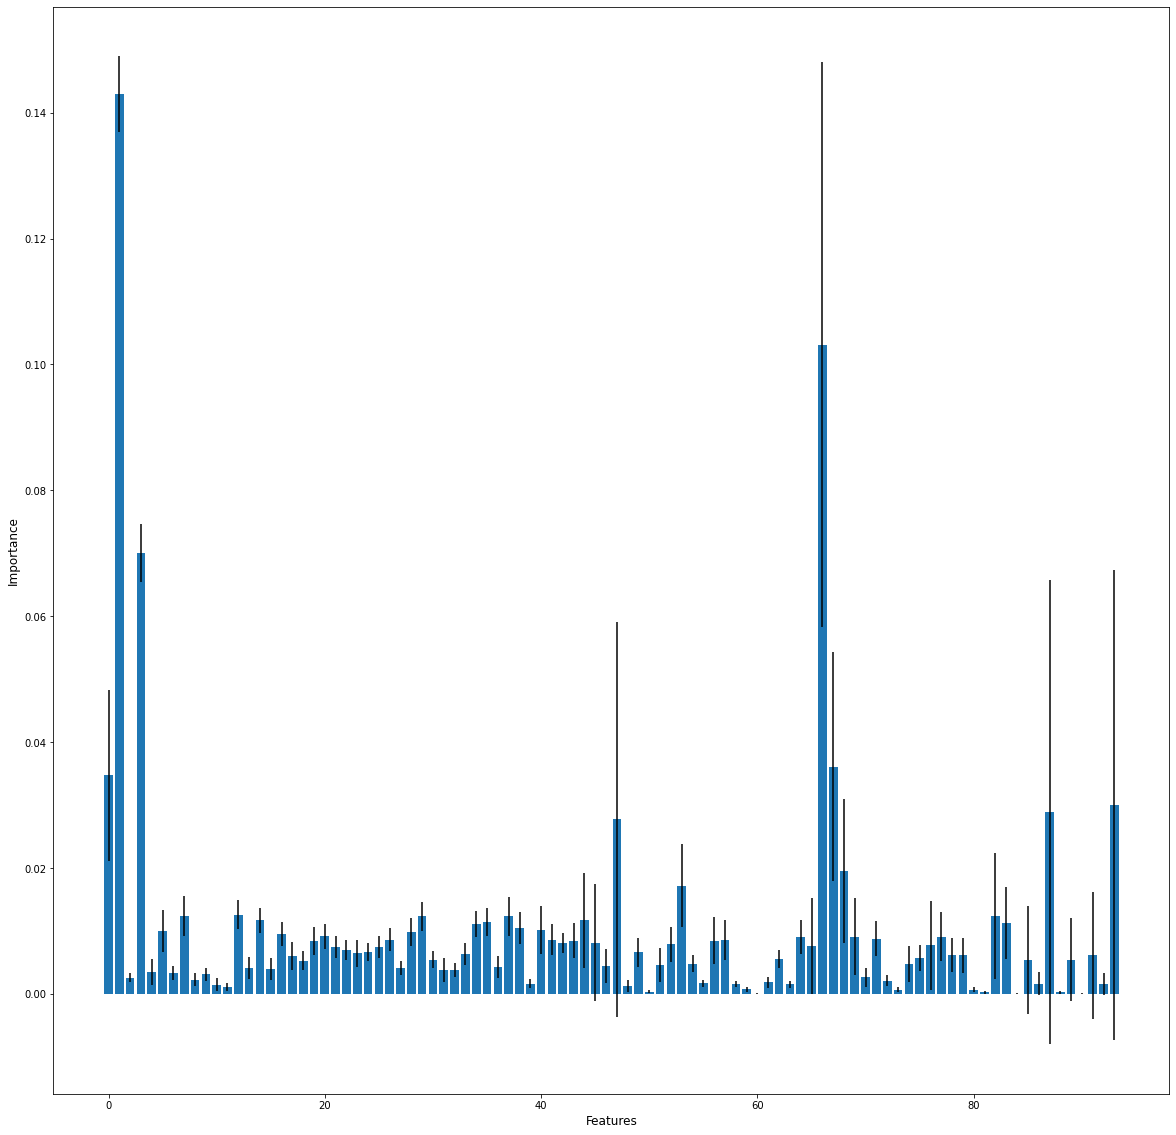

In [ ]:
importance = estimator.feature_importances_
importance = pd.DataFrame(importance, index=X_train.columns, columns=["Importance"])

importance["Std"] = np.std([tree.feature_importances_ for tree in estimator.estimators_], axis=0)

x = range(importance.shape[0])
y = importance.iloc[:, 0]
yerr = importance.iloc[:, 1]
lables = list(train_df.columns.values)


plt.figure(figsize=(20,20))
ax = plt.bar(x, y, yerr=yerr ,align="center")
plt.xlabel('Features', fontsize = 12)
plt.ylabel('Importance', fontsize = 12)

#plt.show()

In [ ]:
pd.set_option('display.max_rows', 100)
major_features=importance[importance.Importance>=0.01]
display(major_features)
pd.set_option('display.max_rows', 15)

,Importance,Std
amount_tsh,0.034706,0.013641
days_since_recorded,0.142968,0.006037
population,0.070046,0.004568
funder_gov,0.010022,0.003371
funder_other,0.012369,0.003148
installer_dwe,0.012591,0.002344
installer_other,0.011671,0.002050
scheme_management_vwc,0.012324,0.002280
permit_False,0.011067,0.002043
permit_True,0.011370,0.002250


In [ ]:
selected_features = list(major_features.index.values)
selected_features

['amount_tsh',
 'days_since_recorded',
 'population',
 'funder_gov',
 'funder_other',
 'installer_dwe',
 'installer_other',
 'scheme_management_vwc',
 'permit_False',
 'permit_True',
 'construction_year_00s',
 'construction_year_10s',
 'construction_year_70s',
 'extraction_type_class_gravity',
 'extraction_type_class_other',
 'payment_type_never pay',
 'quantity_dry',
 'quantity_enough',
 'quantity_insufficient',
 'waterpoint_type_communal standpipe',
 'waterpoint_type_communal standpipe multiple',
 'waterpoint_type_other',
 'waterpoint_type_group_other']

In [ ]:
new_X_train = X_train[selected_features]


In [ ]:
new_X_val = X_val[selected_features]


In [ ]:
estimator = RandomForestClassifier(n_estimators=1000, min_samples_split=6,
                                    criterion='gini', max_features='auto', oob_score=True,random_state=1,n_jobs=-1)
estimator.fit(new_X_train, y_train)

training_accuracy = estimator.score(new_X_train, y_train)   
print('Training accuracy: ', training_accuracy)                          
validation_accuracy = estimator.score(new_X_val, y_val)
print('Validation accuracy: ', validation_accuracy)

Training accuracy:  0.8874859708193041
Validation accuracy:  0.7800224466891134


**Using complete set of features:**

    Training accuracy:  0.8970819304152637
    Validation accuracy:  0.7950617283950617

**Using Selected features based on importnace**

    Training accuracy:  0.8874859708193041
    Validation accuracy:  0.7800224466891134

We can see that we are getting almost similar accuracy for our model with lesser features there by making the model computationally less expensive

Also we can also identify that "quantity" and "day_since_Recorded" are the two msot important features

# Visualising Boundaries

Visualising Decision Tree

In [ ]:

decisiontree = DecisionTreeClassifier()
model = decisiontree.fit(X_train,y_train)

dot_data = tree.export_graphviz(decisiontree,out_file = None,feature_names = features,
                            class_names=classes)
graph = pydotplus.graph_from_dot_data(dot_data)

graph.write_png('tree.png')

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.0713227 to fit



True

Attaching 'tree.png' along with the files uploaded

# References:



1.   https://towardsdatascience.com/predicting-the-functional-status-of-pumps-in-tanzania-355c9269d0c2
2.   https://towardsdatascience.com/water-pumps-maintenance-prediction-data-science-illustrated-20c7100017c5
3.  https://www.geeksforgeeks.org/python-pandas-get_dummies-method/
4. https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html
5.  https://www.marsja.se/how-to-use-pandas-get_dummies-to-create-dummy-variables-in-python/
6. https://koalatea.io/sklearn-decision-tree-vizualization/

